In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the datasets

#Loading the first file
df1 = pd.read_csv(r"C:\Users\SMei\OneDrive - Healthfirst\Documents\DOHMH_School_Cafeteria_inspections_2016-2019.csv")

#loading the second file
df2 = pd.read_csv(r"C:\Users\SMei\OneDrive - Healthfirst\Documents\DOHMH_School_Cafeteria_Inspections__2020-Present.csv")


In [3]:
#Identifying the difference in Column Names
df1_columns = set(df1.columns)
df2_columns = set(df2.columns)

#Columns only in df1
only_in_df1 = df1_columns - df2_columns
print("Columns only in df1:", only_in_df1)

#Columns only in df2
only_in_df2 = df2_columns - df1_columns
print("Columns only in df2:", only_in_df2)


Columns only in df1: {'Last Inspection Date', 'Violation Description', 'Inspection Date'}
Columns only in df2: {'LastInspection', 'ViolationDescription', 'InspectionDate'}


In [4]:
#columns to rename
columns_to_rename = {'LastInspection': 'Last Inspection Date', 'ViolationDescription': 'Violation Description', 'InspectionDate': 'Inspection Date'}

#Renaming columns in df2 to match df1
df2.rename(columns=columns_to_rename, inplace=True)

#Checking Renamed Columns
df2.columns

Index(['Record ID', 'SchoolName', 'Number', 'Street', 'City', 'State',
       'Borough', 'ZipCode', 'Last Inspection Date', 'Permittee',
       'Inspection Date', 'PTET', 'Site Type', 'Critical Level', 'Code',
       'Violation Description', 'LATITUDE', 'LONGITUDE', 'COMMUNITYBOARD',
       'COUNCILDISTRICT', 'CENSUSTRACT', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [5]:
#Combining the DataFrames by stacking vertically
combined_df = pd.concat([df1,df2], axis = 0)

#viewing combined_df
combined_df

,Record ID,SchoolName,Number,Street,City,State,Borough,ZipCode,Last Inspection Date,Permittee,...,Code,Violation Description,LATITUDE,LONGITUDE,COMMUNITYBOARD,COUNCILDISTRICT,CENSUSTRACT,BIN,BBL,NTA
0,347831,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,616,QUINCY ST,Brooklyn,NY,Brooklyn,11221.0,10/8/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,...,05H,"No facilities available to wash, rinse and san...",40.688688,-73.935499,303.0,36.0,29300.0,3044493.0,3016300001,BK35
1,130374,WILLIAM SPYROPOULOS SCHOOL,19610,NORTHERN BOULEVARD,"FLUSHING, NY 11358",NY,Queens,11358.0,1/18/2019,NICHOLAS GREEK ST.,...,04N,Filth flies or food/refuse/sewage-associated (...,40.757903,-73.785196,411.0,19.0,145101.0,4124560.0,4055200001,QN48
2,54040,P.S. 145 THE BLOOMINDALE SCHOOL,150,WEST 105 STREET,"NEW YORK, NY 10025",NY,Manhattan,10025.0,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,10F,Non-food contact surface improperly constructe...,40.799369,-73.965308,107.0,7.0,18900.0,1076625.0,1018590001,MN12
3,54627,P.S. 119 BROOKLYN,3829,AVENUE K,"BROOKLYN, NY 11210",NY,Brooklyn,11210.0,7/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,10E,Accurate thermometer not provided in refrigera...,40.625655,-73.938265,318.0,45.0,73400.0,3215816.0,3077860001,BK58
4,82920,MERKAZ HATORAH OF BELLE HARBOR,505,BEACH 129 STREET,"BELLE HARBOR, NY 11694",NY,Queens,11694.0,11/6/2019,HATORAH OF BELL MERCAZ,...,18A,"Current valid permit, registration or other au...",40.580035,-73.850350,414.0,32.0,93401.0,4304071.0,4161970041,QN10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15510,40740823,MESIVTA TIFERETH JERUSALEM,141147,EAST BROADWAY,NEW YORK,NY,Manhattan,NaN,3/29/2024,MESIFTA TIFERETH JERUSALEM INC,...,04K,Evidence of rats or live rats in establishment...,0.000000,0.000000,NaN,NaN,NaN,NaN,1,NaN
15511,40540797,"I.S. 204 OLIVER W. HOLMES, ENERGY TECH HIGH SC...",3641,28 STREET,ASTORIA,NY,Queens,11106.0,11/1/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,...,10E,Accurate thermometer not provided or properly ...,40.757058,-73.932664,401.0,26.0,5100.0,4004156.0,4003430001,QN68
15512,40597795,PS/IS 30 ANNEX,415,OVINGTON AVENUE,Brooklyn,NY,Brooklyn,11209.0,9/28/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,...,NaN,NaN,40.633437,-74.023249,310.0,43.0,13000.0,3145771.0,3058730084,BK31
15513,40541455,"P.S. 38 ROBERTO CLEMENTE, HARLEM PREP CHARTER ...",232,EAST 103 STREET,New York,NY,Manhattan,10029.0,9/28/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,...,10F,Non-food contact surface improperly constructe...,40.788945,-73.944538,111.0,8.0,16400.0,1052384.0,1016520016,MN33


In [6]:
#viewing column names in combined_df
combined_df.columns

Index(['Record ID', 'SchoolName', 'Number', 'Street', 'City', 'State',
       'Borough', 'ZipCode', 'Last Inspection Date', 'Permittee',
       'Inspection Date', 'PTET', 'Site Type', 'Critical Level', 'Code',
       'Violation Description', 'LATITUDE', 'LONGITUDE', 'COMMUNITYBOARD',
       'COUNCILDISTRICT', 'CENSUSTRACT', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [7]:
#Creating a new DataFrame for columns I will be working with
df_new = combined_df[['SchoolName', 'Borough', 'Last Inspection Date', 'Permittee', 'PTET', 'Site Type', 'Critical Level', 'Code', 'Violation Description']]
df_new

,SchoolName,Borough,Last Inspection Date,Permittee,PTET,Site Type,Critical Level,Code,Violation Description
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,10/8/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,2533,FSE (Private School Cafeteria - Not-For-Profit),C,05H,"No facilities available to wash, rinse and san..."
1,WILLIAM SPYROPOULOS SCHOOL,Queens,1/18/2019,NICHOLAS GREEK ST.,2533,FSE (Private School Cafeteria - Not-For-Profit),C,04N,Filth flies or food/refuse/sewage-associated (...
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10F,Non-food contact surface improperly constructe...
3,P.S. 119 BROOKLYN,Brooklyn,7/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10E,Accurate thermometer not provided in refrigera...
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,11/6/2019,HATORAH OF BELL MERCAZ,2533,FSE (Private School Cafeteria - Not-For-Profit),AV,18A,"Current valid permit, registration or other au..."
...,...,...,...,...,...,...,...,...,...
15510,MESIVTA TIFERETH JERUSALEM,Manhattan,3/29/2024,MESIFTA TIFERETH JERUSALEM INC,2533,FSE (Private School Cafeteria - Not-For-Profit),C,04K,Evidence of rats or live rats in establishment...
15511,"I.S. 204 OLIVER W. HOLMES, ENERGY TECH HIGH SC...",Queens,11/1/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10E,Accurate thermometer not provided or properly ...
15512,PS/IS 30 ANNEX,Brooklyn,9/28/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),NaN,NaN,NaN
15513,"P.S. 38 ROBERTO CLEMENTE, HARLEM PREP CHARTER ...",Manhattan,9/28/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10F,Non-food contact surface improperly constructe...


In [8]:
#Identifying duplicate rows
duplicate_rows = df_new.duplicated()

In [9]:
#Removing Duplicate Rows
df_new2 = df_new.drop_duplicates()
df_new2


,SchoolName,Borough,Last Inspection Date,Permittee,PTET,Site Type,Critical Level,Code,Violation Description
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,10/8/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,2533,FSE (Private School Cafeteria - Not-For-Profit),C,05H,"No facilities available to wash, rinse and san..."
1,WILLIAM SPYROPOULOS SCHOOL,Queens,1/18/2019,NICHOLAS GREEK ST.,2533,FSE (Private School Cafeteria - Not-For-Profit),C,04N,Filth flies or food/refuse/sewage-associated (...
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10F,Non-food contact surface improperly constructe...
3,P.S. 119 BROOKLYN,Brooklyn,7/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10E,Accurate thermometer not provided in refrigera...
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,11/6/2019,HATORAH OF BELL MERCAZ,2533,FSE (Private School Cafeteria - Not-For-Profit),AV,18A,"Current valid permit, registration or other au..."
...,...,...,...,...,...,...,...,...,...
15505,BRONX CHARTER SCHOOL FOR EXCELENCE 5,Bronx,1/19/2024,BRONX CHARTER SCHOOL FOR EXCELENCE 5,2533,FSE (Private School Cafeteria - Not-For-Profit),C,04L,Evidence of mice or live mice in establishment...
15508,ST JOSEPH HILL ACADEMY,Staten Island,5/16/2024,"FOUR SEASONS FOOD SERVICE MANAGEMENT, INC.",2529,FSE (Private School Cafeteria - For Profit),CH,02G,Cold TCS food item held above 41 °F; smoked or...
15509,KIPP NYC COLLEGE PREP HIGH SCHOOL,Bronx,9/20/2023,KIPP NYC PUBLIC CHARTER SCHOOLS,2533,FSE (Private School Cafeteria - Not-For-Profit),A,20D,“Choking first aid” poster not posted. “Alcoho...
15511,"I.S. 204 OLIVER W. HOLMES, ENERGY TECH HIGH SC...",Queens,11/1/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10E,Accurate thermometer not provided or properly ...


In [10]:
#checking for any NaN values in df_new2
#per the data dictionary, NaN values mean no violations were Cited during the inspection

df_new2.isnull().sum()

SchoolName                  0
Borough                     0
Last Inspection Date        0
Permittee                   0
PTET                        0
Site Type                   0
Critical Level           3091
Code                     3091
Violation Description    3091
dtype: int64

In [11]:
#Replace all NaN values with "No Violations Cited"
df_new3 = df_new2.fillna("No Violations Cited")
df_new3

,SchoolName,Borough,Last Inspection Date,Permittee,PTET,Site Type,Critical Level,Code,Violation Description
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,10/8/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,2533,FSE (Private School Cafeteria - Not-For-Profit),C,05H,"No facilities available to wash, rinse and san..."
1,WILLIAM SPYROPOULOS SCHOOL,Queens,1/18/2019,NICHOLAS GREEK ST.,2533,FSE (Private School Cafeteria - Not-For-Profit),C,04N,Filth flies or food/refuse/sewage-associated (...
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10F,Non-food contact surface improperly constructe...
3,P.S. 119 BROOKLYN,Brooklyn,7/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10E,Accurate thermometer not provided in refrigera...
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,11/6/2019,HATORAH OF BELL MERCAZ,2533,FSE (Private School Cafeteria - Not-For-Profit),AV,18A,"Current valid permit, registration or other au..."
...,...,...,...,...,...,...,...,...,...
15505,BRONX CHARTER SCHOOL FOR EXCELENCE 5,Bronx,1/19/2024,BRONX CHARTER SCHOOL FOR EXCELENCE 5,2533,FSE (Private School Cafeteria - Not-For-Profit),C,04L,Evidence of mice or live mice in establishment...
15508,ST JOSEPH HILL ACADEMY,Staten Island,5/16/2024,"FOUR SEASONS FOOD SERVICE MANAGEMENT, INC.",2529,FSE (Private School Cafeteria - For Profit),CH,02G,Cold TCS food item held above 41 °F; smoked or...
15509,KIPP NYC COLLEGE PREP HIGH SCHOOL,Bronx,9/20/2023,KIPP NYC PUBLIC CHARTER SCHOOLS,2533,FSE (Private School Cafeteria - Not-For-Profit),A,20D,“Choking first aid” poster not posted. “Alcoho...
15511,"I.S. 204 OLIVER W. HOLMES, ENERGY TECH HIGH SC...",Queens,11/1/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),G,10E,Accurate thermometer not provided or properly ...


In [12]:
#Noticed Column Name: SchoolName is missing a space
#Identifying columns I want to rename
df_new3.columns


Index(['SchoolName', 'Borough', 'Last Inspection Date', 'Permittee', 'PTET',
       'Site Type', 'Critical Level', 'Code', 'Violation Description'],
      dtype='object')

In [13]:
#columns to rename
columns_to_rename1 = {'SchoolName': 'School Name', 'Critical Level': 'Violation Level', 'PTET': 'PTET Code'}

#Renaming columns in df2 to match df1
df_new3.rename(columns=columns_to_rename1, inplace=True)

#Checking Renamed Columns
df_new3.columns

Index(['School Name', 'Borough', 'Last Inspection Date', 'Permittee',
       'PTET Code', 'Site Type', 'Violation Level', 'Code',
       'Violation Description'],
      dtype='object')

In [14]:
#Renaming abbreviated codes in the 'Level' column per the data dictionary
level_mapping = {
    'C': 'Critical Violation',
    'G': 'General Violation',
    'A': 'Administrative Violation',
    'AV': 'Administrative Violation',
    'NV': 'Nutrition Violation',
    'TV': 'Tobacco Violation'}

#Replace the values in the 'Level' column
df_new3['Violation Level'] = df_new3['Violation Level'].replace(level_mapping)

#viewing df_new3
df_new3

,School Name,Borough,Last Inspection Date,Permittee,PTET Code,Site Type,Violation Level,Code,Violation Description
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,10/8/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,2533,FSE (Private School Cafeteria - Not-For-Profit),Critical Violation,05H,"No facilities available to wash, rinse and san..."
1,WILLIAM SPYROPOULOS SCHOOL,Queens,1/18/2019,NICHOLAS GREEK ST.,2533,FSE (Private School Cafeteria - Not-For-Profit),Critical Violation,04N,Filth flies or food/refuse/sewage-associated (...
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),General Violation,10F,Non-food contact surface improperly constructe...
3,P.S. 119 BROOKLYN,Brooklyn,7/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),General Violation,10E,Accurate thermometer not provided in refrigera...
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,11/6/2019,HATORAH OF BELL MERCAZ,2533,FSE (Private School Cafeteria - Not-For-Profit),Administrative Violation,18A,"Current valid permit, registration or other au..."
...,...,...,...,...,...,...,...,...,...
15505,BRONX CHARTER SCHOOL FOR EXCELENCE 5,Bronx,1/19/2024,BRONX CHARTER SCHOOL FOR EXCELENCE 5,2533,FSE (Private School Cafeteria - Not-For-Profit),Critical Violation,04L,Evidence of mice or live mice in establishment...
15508,ST JOSEPH HILL ACADEMY,Staten Island,5/16/2024,"FOUR SEASONS FOOD SERVICE MANAGEMENT, INC.",2529,FSE (Private School Cafeteria - For Profit),CH,02G,Cold TCS food item held above 41 °F; smoked or...
15509,KIPP NYC COLLEGE PREP HIGH SCHOOL,Bronx,9/20/2023,KIPP NYC PUBLIC CHARTER SCHOOLS,2533,FSE (Private School Cafeteria - Not-For-Profit),Administrative Violation,20D,“Choking first aid” poster not posted. “Alcoho...
15511,"I.S. 204 OLIVER W. HOLMES, ENERGY TECH HIGH SC...",Queens,11/1/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),General Violation,10E,Accurate thermometer not provided or properly ...


In [15]:
#Spotted a "CH" in the level column
#Displaying the unique values in the 'Level' column to identify any other outliers

unique_levels = df_new3['Violation Level'].unique()
for level in unique_levels:
    print(level)



Critical Violation
General Violation
Administrative Violation
No Violations Cited
Nutrition Violation
CH
CP


In [16]:
#Updating Level_mapping to include typos CH and CP
level_mapping = {
    'C': 'Critical Violation',
    'CH': 'Critical Violation',
    'CP': 'Critical Violation',
    'G': 'General Violation',
    'A': 'Administrative Violation',
    'AV': 'Administrative Violation',
    'NV': 'Nutrition Violation',
    'TV': 'Tobacco Violation'}

#Replace the values in the 'Level' column
df_new3['Violation Level'] = df_new3['Violation Level'].replace(level_mapping)

#viewing df_new3
df_new3

,School Name,Borough,Last Inspection Date,Permittee,PTET Code,Site Type,Violation Level,Code,Violation Description
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,10/8/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,2533,FSE (Private School Cafeteria - Not-For-Profit),Critical Violation,05H,"No facilities available to wash, rinse and san..."
1,WILLIAM SPYROPOULOS SCHOOL,Queens,1/18/2019,NICHOLAS GREEK ST.,2533,FSE (Private School Cafeteria - Not-For-Profit),Critical Violation,04N,Filth flies or food/refuse/sewage-associated (...
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),General Violation,10F,Non-food contact surface improperly constructe...
3,P.S. 119 BROOKLYN,Brooklyn,7/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),General Violation,10E,Accurate thermometer not provided in refrigera...
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,11/6/2019,HATORAH OF BELL MERCAZ,2533,FSE (Private School Cafeteria - Not-For-Profit),Administrative Violation,18A,"Current valid permit, registration or other au..."
...,...,...,...,...,...,...,...,...,...
15505,BRONX CHARTER SCHOOL FOR EXCELENCE 5,Bronx,1/19/2024,BRONX CHARTER SCHOOL FOR EXCELENCE 5,2533,FSE (Private School Cafeteria - Not-For-Profit),Critical Violation,04L,Evidence of mice or live mice in establishment...
15508,ST JOSEPH HILL ACADEMY,Staten Island,5/16/2024,"FOUR SEASONS FOOD SERVICE MANAGEMENT, INC.",2529,FSE (Private School Cafeteria - For Profit),Critical Violation,02G,Cold TCS food item held above 41 °F; smoked or...
15509,KIPP NYC COLLEGE PREP HIGH SCHOOL,Bronx,9/20/2023,KIPP NYC PUBLIC CHARTER SCHOOLS,2533,FSE (Private School Cafeteria - Not-For-Profit),Administrative Violation,20D,“Choking first aid” poster not posted. “Alcoho...
15511,"I.S. 204 OLIVER W. HOLMES, ENERGY TECH HIGH SC...",Queens,11/1/2023,NEW YORK CITY DEPARTMENT OF EDUCATION,2530,FSE (Public School Cafeteria),General Violation,10E,Accurate thermometer not provided or properly ...


In [17]:
#Counting the occurrences of each level per borough
borough_level_counts = df_new3.groupby(['Borough','Violation Level']).size().unstack(fill_value=0)
print(borough_level_counts)

Violation Level  Administrative Violation  Critical Violation  \
Borough                                                         
Bronx                                 330                 867   
Brooklyn                              684                3658   
Manhattan                             305                1297   
Queens                                243                1580   
Staten Island                          81                 281   

Violation Level  General Violation  No Violations Cited  Nutrition Violation  
Borough                                                                       
Bronx                         1687                  714                    7  
Brooklyn                      5273                  883                   56  
Manhattan                     2086                  565                   24  
Queens                        2437                  735                   12  
Staten Island                  507                  194               

In [18]:
#Counting the occurrences of each level per borough
borough_level_counts = df_new3.groupby(['Borough','Violation Level']).size().reset_index(name = 'Violation Count')

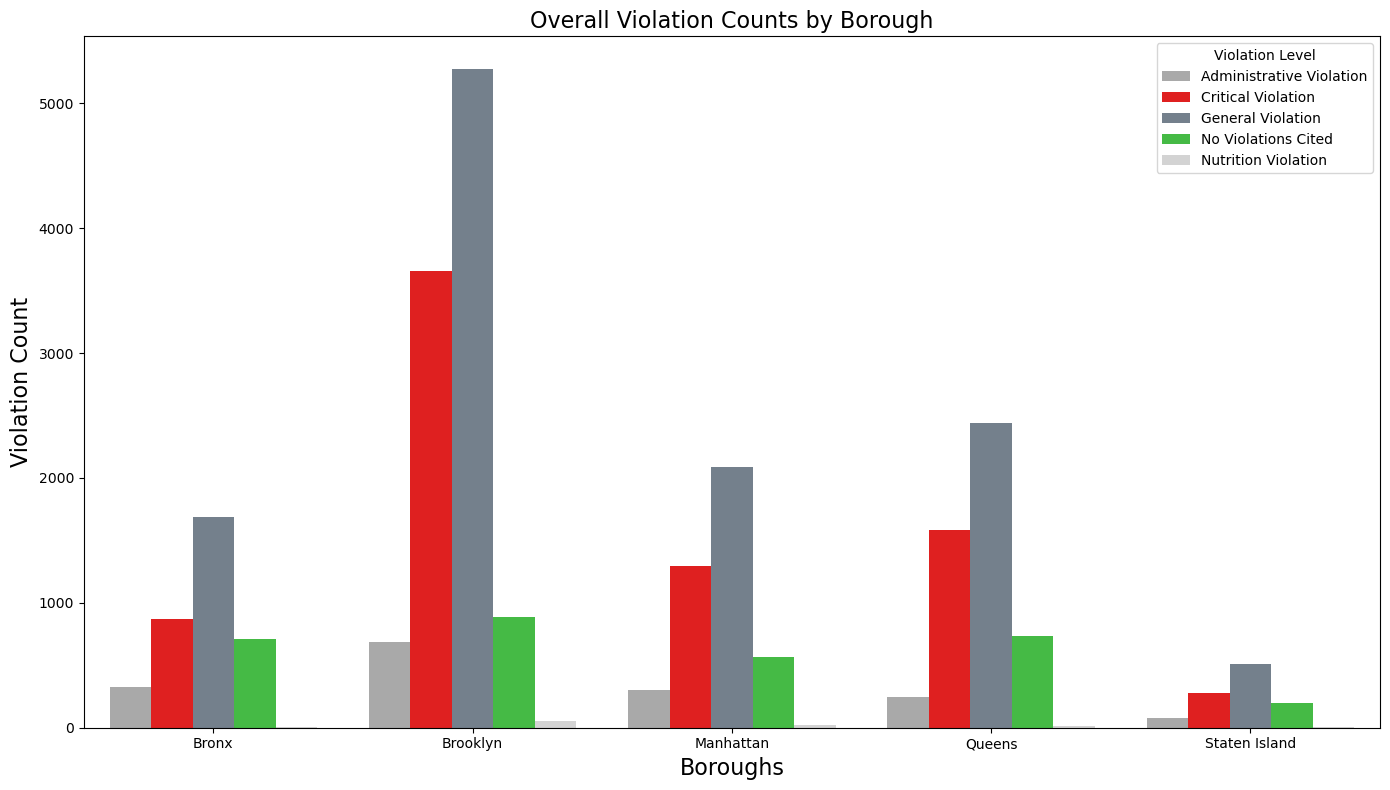

In [41]:
#Creating visualization grouping by borough

#Defining the color palette
palette = {
    'Critical Violation': 'red',
    'No Violations Cited': 'limegreen',
    'Administrative Violation': 'darkgray',
    'General Violation': 'slategray',
    'Nutrition Violation': 'lightgray',
    'Tobacco Violation': 'gray'
}

#Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=borough_level_counts, x = 'Borough', y = 'Violation Count', hue = 'Violation Level', palette=palette)
plt.title('Overall Violation Counts by Borough', fontsize=16)
plt.xlabel('Boroughs', fontsize=16)
plt.ylabel('Violation Count', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\SMei\AppData\Local\Temp\ipykernel_18636\1470928340.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)


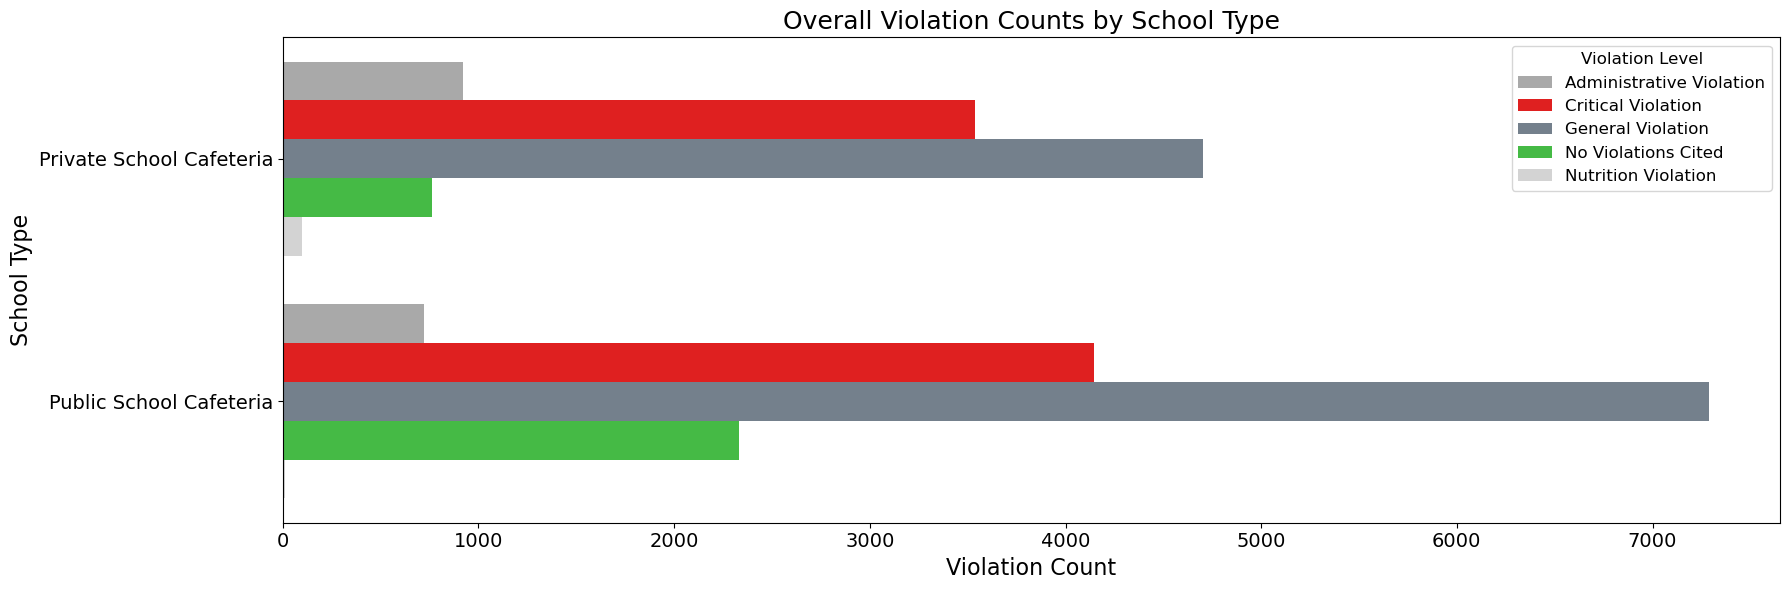

In [42]:
#Creating visualization grouping by School Type
#Combine private school categories into one
df_new3['Site Type'] = df_new3['Site Type']. replace({
    'FSE (Private School Cafeteria - For Profit)': 'Private School Cafeteria',
    'FSE (Private School Cafeteria - Not-For-Profit)': 'Private School Cafeteria',
    'FSE (Private School Cafeteria)': 'Private School Cafeteria',
    'FSE (Public School Cafeteria)': 'Public School Cafeteria',
})

#Counting the occurrences of each level per School Type
SiteType_level_counts = df_new3.groupby(['Site Type','Violation Level']).size().reset_index(name = 'Violation Count')

#Defining the color palette
palette = {
 'Critical Violation': 'red',
    'No Violations Cited': 'limegreen',
    'Administrative Violation': 'darkgray',
    'General Violation': 'slategray',
    'Nutrition Violation': 'lightgray',
    'Tobacco Violation': 'gray'
}

#Create the plot
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=SiteType_level_counts, y = 'Site Type', x = 'Violation Count', hue = 'Violation Level', palette=palette, orient = 'h')
plt.title('Overall Violation Counts by School Type', fontsize=18)
plt.ylabel('School Type', fontsize=16)
plt.xlabel('Violation Count', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
plt.legend(title='Violation Level', title_fontsize=12, fontsize=12)

plt.tight_layout()
plt.show()

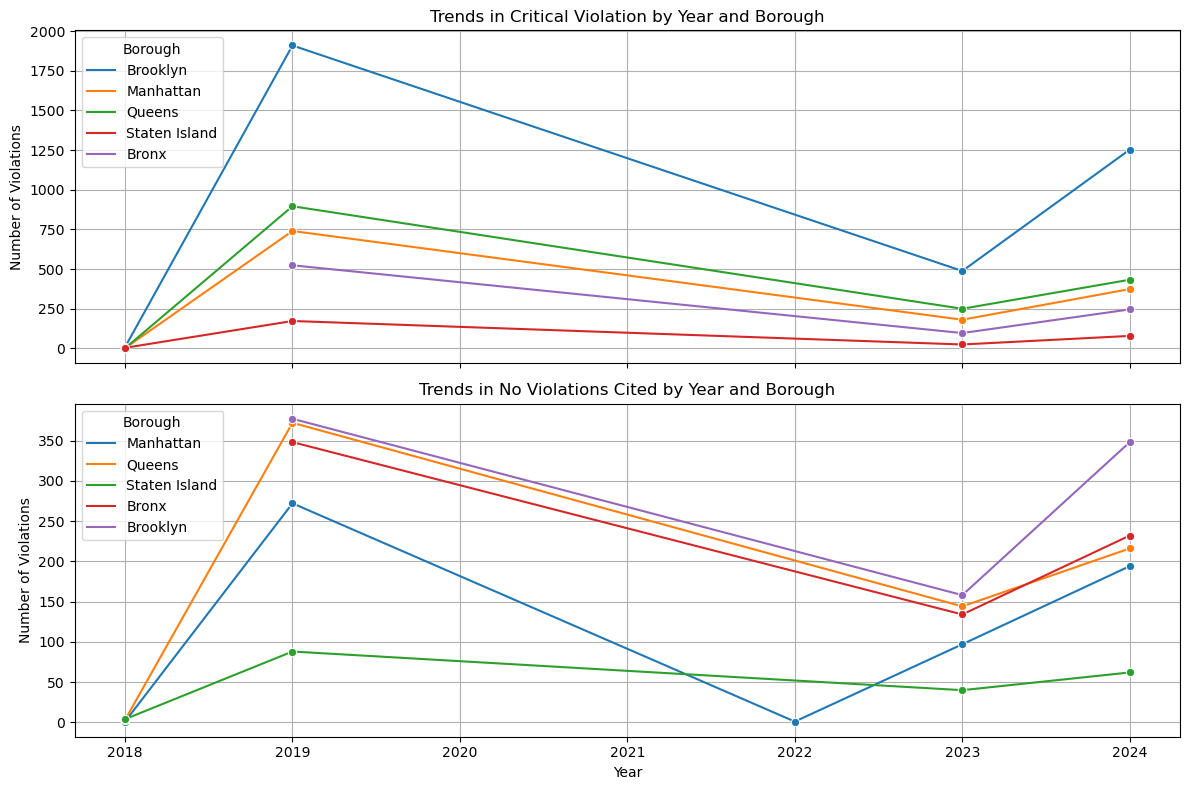

In [30]:
#Convert 'Last Inspection Date' to datetime
df_new3['Last Inspection Date'] = pd.to_datetime(df_new3['Last Inspection Date'])
#Extract year from the 'Last Inspection Date'
df_new3['Year'] = df_new3['Last Inspection Date'].dt.year
#Define Violation Levels to Focus on
violation_levels_to_track = ['Critical Violation', 'No Violations Cited']
#Filter the DF for relevant Violation Levels
df_filtered = df_new3[df_new3['Violation Level'].isin(violation_levels_to_track)]
#Group by Year, Boro and Violation Level, then count the number of violations
grouped=df_filtered.groupby(['Year', 'Borough', 'Violation Level']).size().reset_index(name='Count')

#plot the trends for each violation level
fig, axes = plt.subplots(len(violation_levels_to_track),1,figsize=(12,8), sharex=True)

for i, violation_level in enumerate(violation_levels_to_track):
    sns.lineplot(data=grouped[grouped['Violation Level']== violation_level], x='Year', y='Count', hue='Borough', marker='o', ax=axes[i])
    axes[i].set_title(f'Trends in {violation_level} by Year and Borough')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Violations')
    axes[i].legend(title='Borough')
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()

                              

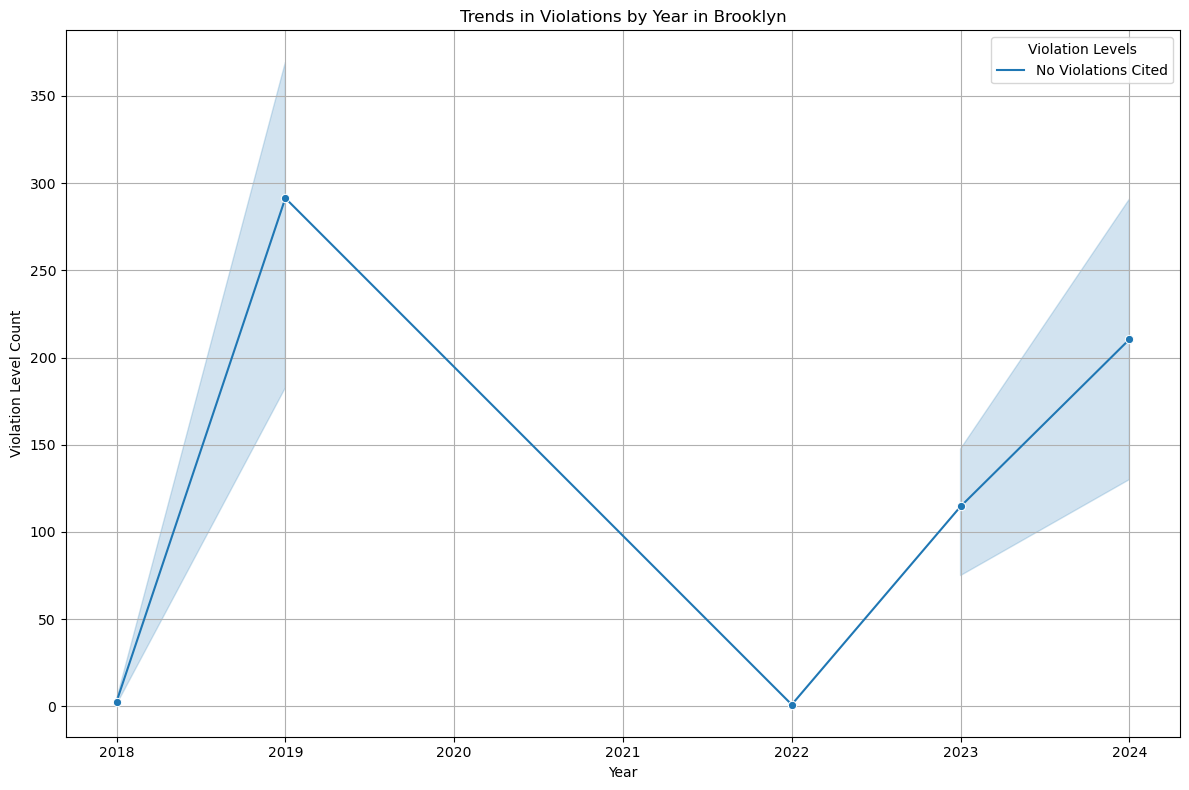

In [31]:
#Filter the DF for Brooklyn and relevant Violation Levels
df_brooklyn = df_new3[(df_new3['Borough']=='Brooklyn') & (df_new3['Violation Level'].isin(violation_levels_to_track))]
#Group by Year and Violation Level, then count the number of violations
grouped1=df_brooklyn.groupby(['Year','Violation Level']).size().reset_index(name='Count')

#plot the trends
plt.figure(figsize=(12,8))
sns.lineplot(data=grouped[grouped['Violation Level']== violation_level], x='Year', y='Count', hue='Violation Level', marker='o')
plt.title('Trends in Violations by Year in Brooklyn')
plt.xlabel('Year')
plt.ylabel('Violation Level Count')
plt.legend(title='Violation Levels')
plt.grid(True)    
plt.tight_layout()
plt.show()



Conclusion:
In conclusion, Brooklyn has the highest number of critical food safety violations.
While critical violations spiked in 2019 and declined in 2023, it is still concerning that the number of critical and general violations cited are significantly higher than instances of no violations cited. 
This indicates a need for increased inspections and compliance efforts across the board
It is interesting to note that the higher tuition fees associated with private schools do not correlate with better cafeteria quality as both types of schools exhibits substantial administrative and critical violations.